In [4]:
import random
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt

In [5]:
def Eucledian_distance(list_x,list_y):
    Sum=0
    for i,j in zip(list_x,list_y):
        Sum+= abs((i-j)**2)
    return sqrt(Sum)

In [6]:
def Manhattan_distance(list_x,list_y):
    Sum=0
    for i,j in zip(list_x,list_y):
        Sum+= abs((i-j))
    return Sum

In [7]:
def Cosine_distance(list_x,list_y):
    numerator=0 
    d1=0
    d2=0
    for i,j in zip(list_x,list_y):
        numerator+= i*j
        d1+= i*i
        d2+= j*j
    distance=( numerator/(sqrt(d1)*sqrt(d2)) ) 
    return distance

In [8]:
def K_means(k,df,v):
    cluster=[]
    dis=[]
    centroid=[]
    temp_cluster=[]
    sample=random.sample(range(1,len(df.transpose())),k)
    for i in range(len(sample)):
        temp_cluster.append([])

    old_cluster=temp_cluster.copy()
    for s in sample:
        centroid.append(list(df[s]))
        
    inc=centroid.copy()

    while(old_cluster!=cluster):
        old_cluster= cluster.copy()
        cluster.clear()
        for i in range(len(sample)):
            cluster.append([])
            
        for i in range(len(df.transpose())):
            for c in centroid:
                if v==1:                                   #v=1 =>Eucledian distance 
                    d=Eucledian_distance(list(df[i]),c)
                if v==2:                                   #v=2 =>Manhattan_distance
                    d=Manhattan_distance(list(df[i]),c)
                dis.append(d)
            cluster[dis.index(min(dis))].append(list(df[i]))
            dis.clear()

        new_centroid=[]
        for cl in cluster:
            temp=np.array(cl)
            new_centroid.append(list(sum(temp)/len(temp)))
        centroid=new_centroid.copy()

    return inc,centroid,cluster

In [9]:
def Measure(clusters):
    precision=0
    recall=0
    for cluster in clusters:
        df=pd.DataFrame(cluster)
        counts=df[301].value_counts()                   #find labels & frequency of labels              
        df_lab=[int(i) for i in list(counts.index)]     #val = labels
        df_count=list(counts.values)                    #count= frequency of the labels
        max_val=max(df_count)
        label=df_lab[df_count.index(max_val)]
        precision+= (max_val / len(cluster))
        if label==1:
            recall+= (max_val / n1)
        elif label==2:
            recall+= (max_val / n2)
        elif label==3:
            recall+= (max_val / n3)
        else:
            recall+= (max_val / n4)
            
    precision/= len(clusters)                           #avg precision
    recall/= len(clusters)                              #avg recall
    F_score= (2*precision*recall)/(precision + recall)
    return precision, recall, F_score

In [12]:
df1=pd.read_csv("animals",sep=' ', header=None)
df1[301]=1
n1=len(df1)
df2=pd.read_csv("countries",sep=' ', header=None)
df2[301]=2
n2=len(df2)
df3=pd.read_csv("fruits",sep=' ', header=None)
df3[301]=3
n3=len(df3)
df4=pd.read_csv("veggies",sep=' ', header=None)
df4[301]=4
n4=len(df4)

In [13]:
df=pd.concat([df1,df2,df3,df4], sort=True)

In [14]:
df.reset_index(drop=True, inplace = True)
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,elephant,-0.015926,-0.079864,-0.33218,0.034246,0.11045,0.060519,-1.1830,-0.70995,-0.15361,...,0.46735,0.086454,0.24495,-0.621270,0.377990,0.709060,-0.023002,0.003908,-0.035713,1
1,leopard,0.477270,-0.915870,-0.29770,-0.224890,0.55337,0.177720,-1.5603,-0.40580,-0.37523,...,0.35108,0.312520,0.16230,0.022012,0.048974,-0.027862,-0.446990,-0.249570,0.028510,1


In [15]:
le = preprocessing.LabelEncoder()
df[0]=le.fit_transform(df[0].astype(str))
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,102,-0.015926,-0.079864,-0.33218,0.034246,0.11045,0.060519,-1.1830,-0.70995,-0.15361,...,0.46735,0.086454,0.24495,-0.621270,0.377990,0.709060,-0.023002,0.003908,-0.035713,1
1,189,0.477270,-0.915870,-0.29770,-0.224890,0.55337,0.177720,-1.5603,-0.40580,-0.37523,...,0.35108,0.312520,0.16230,0.022012,0.048974,-0.027862,-0.446990,-0.249570,0.028510,1


In [16]:
#le.inverse_transform(df[0])

In [17]:
df=df.transpose()

# Majority class based performance measure

## Part 1: Train a K-means model with Eucledian distance

In [18]:
initial_centroid,final_centroid,cluster=K_means(4,df,1)

## Part 2: compute the precision, recall and F-score for K=1 to 10

In [19]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df,1)
    p,r,f=Measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

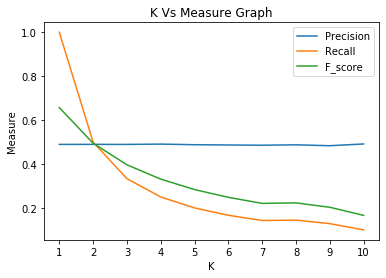

In [20]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 3: After normalization compute the precision, recall and F-score

In [21]:
temp=df.transpose()
temp1=temp[301]
df2=temp.drop([301], axis=1)
df2= (df2 - df2.min())/abs(df2.max() - df2.min())
df2[301]=temp1

In [22]:
df2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,0.311927,0.428078,0.44652,0.363367,0.638879,0.456141,0.688529,0.445063,0.128857,0.438771,...,0.697036,0.567474,0.559925,0.113278,0.754458,0.852225,0.552816,0.495485,0.455974,1.0
1,0.577982,0.643312,0.00000,0.380787,0.524303,0.659224,0.735469,0.341388,0.287459,0.326742,...,0.641100,0.670362,0.518768,0.464372,0.581125,0.448372,0.315557,0.347294,0.490156,1.0


In [23]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df2,1)
    p,r,f=Measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

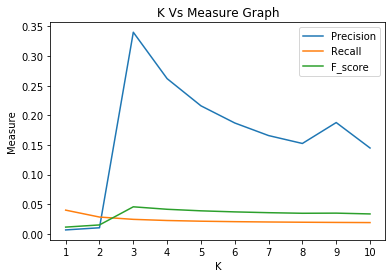

In [24]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 4: use manhattan distance

In [25]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df,2)
    p,r,f=Measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

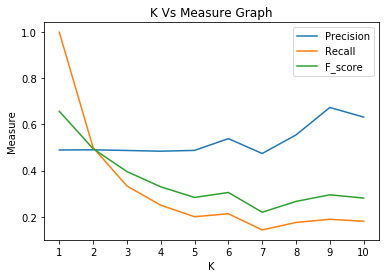

In [26]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 5: use cosine similarity

In [27]:
def k_means(k,df):
    cluster=[]
    dis=[]
    centroid=[]
    temp_cluster=[]
    sample=random.sample(range(1,len(df.transpose())),k)
    for i in range(len(sample)):
        temp_cluster.append([])

    old_cluster=temp_cluster.copy()
    for s in sample:
        centroid.append(list(df[s]))
        
    inc=centroid.copy()
    it=0
    while(old_cluster!=cluster and it<500):
        old_cluster= cluster.copy()
        cluster.clear()
        for i in range(len(sample)):
            cluster.append([centroid[i]])
            
        for i in range(len(df.transpose())):
            for c in centroid:
                d=Cosine_distance(list(df[i]),c)
                dis.append(d)
            cluster[dis.index(min(dis))].append(list(df[i]))
            dis.clear()

        new_centroid=[]
        for cl in cluster:
            temp=np.array(cl)
            new_centroid.append(list(sum(temp)/len(temp)))
        centroid=new_centroid.copy()
        it+=1
    
    return inc,centroid,cluster

In [ ]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=k_means(k,df)
    p,r,f=Measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

In [ ]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 6: comparison

Best k means value is 2

Normalization is not useful here, peformance after normalization declines

performance of measure with respect to F-score: cosine similarity> manhattan distance= eucledian distance

# Purity based performance measure

## Part 2

In [ ]:
def fact(n): 
    res=1
    for i in range(2, n+1): 
        res=res*i 
    return res 

def nCr(n,r): 
    if n>=2:
        temp=(fact(n) / (fact(r)*fact(n - r)))
    else:
        temp=0
    return temp

In [ ]:
def measure(clusters):
    tp_fp=0
    tp=0
    all_count=[]
    for cl in cluster:
        tp_fp+= nCr(len(cl),2)
        df3=pd.DataFrame(cl)
        counts=df3[301].value_counts()               
        labels=[int(i) for i in list(counts.index)] 
        count=list(counts.values)
        for c in count:
            tp+= nCr(c,2)

        for i in range(1,5):
            if i not in labels:
                labels.append(i)
                count.append(0)

        zipped_pairs = zip(labels,count)           
        count = [j for i,j in sorted(zipped_pairs)]
        label=sorted(labels)
        all_count.append(count)
    v1=n1
    v2=n2
    v3=n3
    v4=n4
    t1=t2=t3=t4=0
    for count in all_count:
        v1-=count[0]
        v2-=count[1]
        v3-=count[2]
        v4-=count[3]
        t1+= count[0]*v1
        t2+= count[1]*v2
        t3+= count[2]*v3
        t4+= count[3]*v4
    fn=t1+t2+t3+t4
    precision= tp/(tp_fp)
    recall= tp/(tp+fn)
    F_score= (2*precision*recall)/(precision + recall)
    return precision, recall, F_score

In [ ]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df,1)
    p,r,f=measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

In [ ]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 3

In [ ]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df2,1)
    p,r,f=measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

In [ ]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 4

In [ ]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=K_means(k,df,2)
    p,r,f=measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

In [ ]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 5

In [ ]:
precision=[] 
recall=[] 
F_score=[]
K=[]
for k in range(1,11):
    initial_centroid,final_centroid,cluster=k_means(k,df)
    p,r,f=measure(cluster)
    precision.append(p)
    recall.append(r)
    F_score.append(f)
    K.append(k)

In [ ]:
plt.plot(K,precision, label="Precision")   
plt.plot(K,recall, label="Recall")
plt.plot(K,F_score, label="F_score")
plt.xticks(K)  
plt.xlabel('K') 
plt.ylabel('Measure') 
plt.title('K Vs Measure Graph') 
plt.legend() 
plt.show() 

## Part 6: comparison

performance of measure with respect to F-score: cosine similarity> manhattan distance = eucledian distance

Normalization is not useful here, peformance after normalization declines

Best k means value for cosine similarity is 4

Best k means value for manhattan distance & eucledian distance is 2 & 3